## Gradient Boosting Classifier 

#### TL;DR

In [4]:
from sklearn.ensemble import GradientBoostingClassifier # Algorithm

In [9]:
ALG = GradientBoostingClassifier(loss='deviance', 
                                 learning_rate=0.1, 
                                 n_estimators=100, 
                                 subsample=1.0, 
                                 criterion='friedman_mse', 
                                 min_samples_split=2, 
                                 min_samples_leaf=1, 
                                 min_weight_fraction_leaf=0.0, 
                                 max_depth=3, 
                                 min_impurity_decrease=0.0, 
                                 min_impurity_split=None, 
                                 init=None, 
                                 random_state=None, 
                                 max_features=None, 
                                 verbose=0, 
                                 max_leaf_nodes=None, 
                                 warm_start=False, 
                                 presort='auto', 
                                 validation_fraction=0.1, 
                                 n_iter_no_change=None, 
                                 tol=0.0001)
ALG

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

### 1. Example with code

In [6]:
import os # Files
import pandas as pd # Tables
import matplotlib.pyplot as plt # Plots
from sklearn.model_selection import train_test_split # ML

# Load cleaned and preprocessed CSV file as a dataframe.
fp = os.path.join('', 'tweets_sentiment.csv')    # File path
df = pd.read_csv(fp, sep='\t', encoding='utf-8') # Load as dataframe

<b>Example problem</b>: Predict tweet sentiment basing on it's  nr of hashtags, retweet and like counts. 

<b>Example data</b>: consists of 3800 tweets obtained by twitter search API on phrases like psychology + AI (and simillar) saved and cleaned previously as a tweets_sentiment.csv file. Features:

In [7]:
df.head(3)

,tweet,hashtags,hashtags_number,likes,retweets,sentiment,sentiment_class
0,vanguardsw rt chboursin ai achieve human like ...,human-like skills,2,0,7,0.2200,Positive
1,windy interview really groundbreaking can t wr...,interview groundbreaking. head DeepState reali...,6,0,3,0.2000,Positive
2,ai s top researchers think artificial general ...,ai’s ai artificialintelligence agi human,5,1,0,-0.0125,Negative


- <b>tweet</b>           - tweet text.
- <b>hashtags</b>        - #hashtags in a tweet.
- <b>hashtags_number</b> - number of hashtags.
- <b>likes</b>           - number of tweet likes 
- <b>retweets</b>        - number of times tweet have been shared.
- <b>sentiment</b>       - score in range: -1.0 to 1.0 .
- <b>sentiment_class</b> - score simplified to: Positive ( > 0) and Negative ( < 0).

<b>Example code:</b>

Accuracy - train: 0.72
Accuracy - test:  0.7
First three predictions (of 950): ['Positive' 'Positive' 'Positive'] ...
First three propabilities (of 950): [[0.30200392 0.69799608]
 [0.29922156 0.70077844]
 [0.15692453 0.84307547]] ...


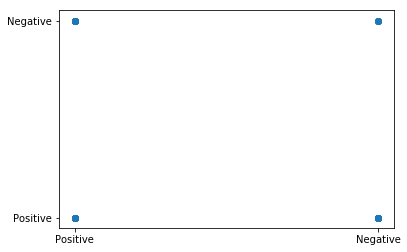

In [10]:
# Gradient Boosting Classifier

# Divide data into features(X) and labels(y).
y =  df.loc[ :, 'sentiment_class'] # column of labels to predict
X =  df.loc[ :, ['retweets', 'likes', 'hashtags_number']] # columns of features used to predict label

# Split both features(X) and labels(y) into training and testing datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Load and define Gradient Boosting Classifier.
GBC = GradientBoostingClassifier(loss='deviance', 
                                 learning_rate=0.1, 
                                 n_estimators=100, 
                                 subsample=1.0, 
                                 criterion='friedman_mse', 
                                 min_samples_split=2, 
                                 min_samples_leaf=1, 
                                 min_weight_fraction_leaf=0.0, 
                                 max_depth=3, 
                                 min_impurity_decrease=0.0, 
                                 min_impurity_split=None, 
                                 init=None, 
                                 random_state=None, 
                                 max_features=None, 
                                 verbose=0, 
                                 max_leaf_nodes=None, 
                                 warm_start=False, 
                                 presort='auto', 
                                 validation_fraction=0.1, 
                                 n_iter_no_change=None, 
                                 tol=0.0001)

# Fit data into model.
GBC.fit(X_train, y_train)

# Results.
accuracy_train = round(GBC.score(X_train, y_train), 2)
accuracy_test  = round(GBC.score(X_test,  y_test), 2)
predictions = GBC.predict(X_test) # an array.
probabilities = GBC.predict_proba(X_test) # an array.

# Display results.
print('Accuracy - train: {}\nAccuracy - test:  {}\nFirst three predictions (of {}): {} ...\nFirst three propabilities (of {}): {} ...'.format(accuracy_train, accuracy_test, len(predictions), predictions[:3], len(probabilities), probabilities[:3]))
plt.scatter(y_test, predictions)
plt.show()

### 2. Key info

- [ADD MORE],
- (To be updated.)

### 3. Template

In [ ]:
import os # Get file
import pandas as pd # Read as pandas table; dataframe (df).
from sklearn.model_selection import train_test_split # Train/Test set divide.
from sklearn.ensemble import RandomForestClassifier # Algorithm
import matplotlib.pyplot as plt # Plots

# You fill three lines below.
# ---------------------------
file_name   = 'your file_name.csv' # csv file in same dir  as this notebook.
predit_what = 'column_name' # The label to predict.
based_on    = ['column_name', 'column_name'] # The features to use in this quest.

# You may wany to change full file path / use existing dataframe. 
fp = os.path.join('', file_name) # fp = 'home/data/file_path.csv'
df = pd.read_csv(fp, sep='\t', encoding='utf-8') # df = my_df 


# Gradient Boosting Classifier

# Divide data into features(X) and labels(y).
X =  df.loc[ :, based_on]    # features
y =  df.loc[ :, predit_what] # label

# Split both features(X) and labels(y) into training and testing datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Load and define Gradient Boosting Classifier.
GBC = GradientBoostingClassifier(loss='deviance', 
                                 learning_rate=0.1, 
                                 n_estimators=100, 
                                 subsample=1.0, 
                                 criterion='friedman_mse', 
                                 min_samples_split=2, 
                                 min_samples_leaf=1, 
                                 min_weight_fraction_leaf=0.0, 
                                 max_depth=3, 
                                 min_impurity_decrease=0.0, 
                                 min_impurity_split=None, 
                                 init=None, 
                                 random_state=None, 
                                 max_features=None, 
                                 verbose=0, 
                                 max_leaf_nodes=None, 
                                 warm_start=False, 
                                 presort='auto', 
                                 validation_fraction=0.1, 
                                 n_iter_no_change=None, 
                                 tol=0.0001)
# Fit data into model.
GBC.fit(X_train, y_train, sample_weight=None)

# Results.
accuracy_train = round(GBC.score(X_train, y_train), 2)
accuracy_test  = round(GBC.score(X_test,  y_test), 2)
predictions = GBC.predict(X_test) # an array.
probabilities = GBC.predict_proba(X_test) # an array.

# Display results.
print('Accuracy - train: {}\nAccuracy - test:  {}\nFirst three predictions (of {}): {} ...\nFirst three propabilities (of {}): {} ...'.format(accuracy_train, accuracy_test, len(predictions), predictions[:3], len(probabilities), probabilities[:3]))
plt.scatter(y_test, predictions)
plt.show()

#### Concise

In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier # Algorithm
import matplotlib.pyplot as plt

fp = os.path.join('', 'your file_name.csv')
df = pd.read_csv(fp, sep='\t', encoding='utf-8')

X =  df.loc[ :, ['feature_column_name', 'feature_column_name']]
y =  df.loc[ :, 'label_column_name']
X_train, X_test, y_train, y_test = train_test_split(X, y)

GBC = GradientBoostingClassifier(loss='deviance', 
                                 learning_rate=0.1, 
                                 n_estimators=100, 
                                 subsample=1.0, 
                                 criterion='friedman_mse', 
                                 min_samples_split=2, 
                                 min_samples_leaf=1, 
                                 min_weight_fraction_leaf=0.0, 
                                 max_depth=3, 
                                 min_impurity_decrease=0.0, 
                                 min_impurity_split=None, 
                                 init=None, 
                                 random_state=None, 
                                 max_features=None, 
                                 verbose=0, 
                                 max_leaf_nodes=None, 
                                 warm_start=False, 
                                 presort='uto', 
                                 validation_fraction=0.1, 
                                 n_iter_no_change=None, 
                                 tol=0.0001).fit(X_train, y_train)

accuracy_train = round(GBC.score(X_train, y_train), 2)
accuracy_test  = round(GBC.score(X_test,  y_test), 2)
predictions = GBC.predict(X_test)
probabilities = GBC.predict_proba(X_test)

print('Accuracy - train: {}\nAccuracy - test:  {}\nFirst three predictions (of {}): {} ...\nFirst three propabilities (of {}): {} ...'.format(accuracy_train, accuracy_test, len(predictions), predictions[:3], len(probabilities), probabilities[:3]))
plt.scatter(y_test, predictions)
plt.show()

### 4. More

To be updated.

By Luke, 13 II 2019.